In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf  # Import yfinance library

In [2]:
# Define the date range
start = '2010-01-01'
end = '2023-01-01'

# Use yfinance to fetch AAPL data
df = yf.download('AAPL', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127045,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307251,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339417,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,128.889572,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.207794,77034200


In [4]:
df.reset_index()
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478997,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490201,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [5]:
df= df.drop(['Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,447610800


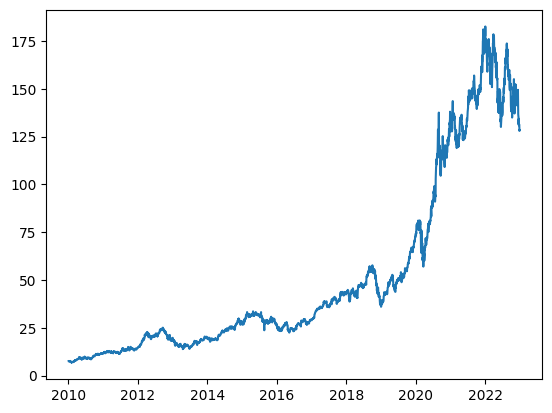

In [6]:
plt.plot(df['Open'])

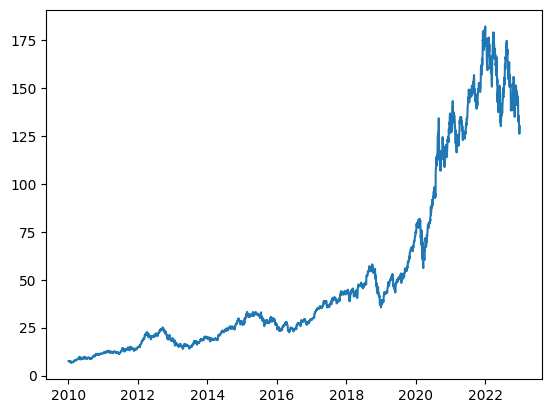

In [7]:
plt.plot(df['Close'])

In [8]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,85438400


In [9]:
# Rolling Function is used to calculate the moving average of the stock price
ma50 = df['Close'].rolling(50).mean()
ma50

Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
2010-01-08           NaN
                 ...    
2022-12-23    144.131800
2022-12-27    143.964799
2022-12-28    143.637399
2022-12-29    143.354599
2022-12-30    143.075999
Name: Close, Length: 3272, dtype: float64

In [10]:
ma200 = df['Close'].rolling(200).mean()
ma200

Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
                ...   
2022-12-23    152.1331
2022-12-27    152.0096
2022-12-28    151.8867
2022-12-29    151.7593
2022-12-30    151.6110
Name: Close, Length: 3272, dtype: float64

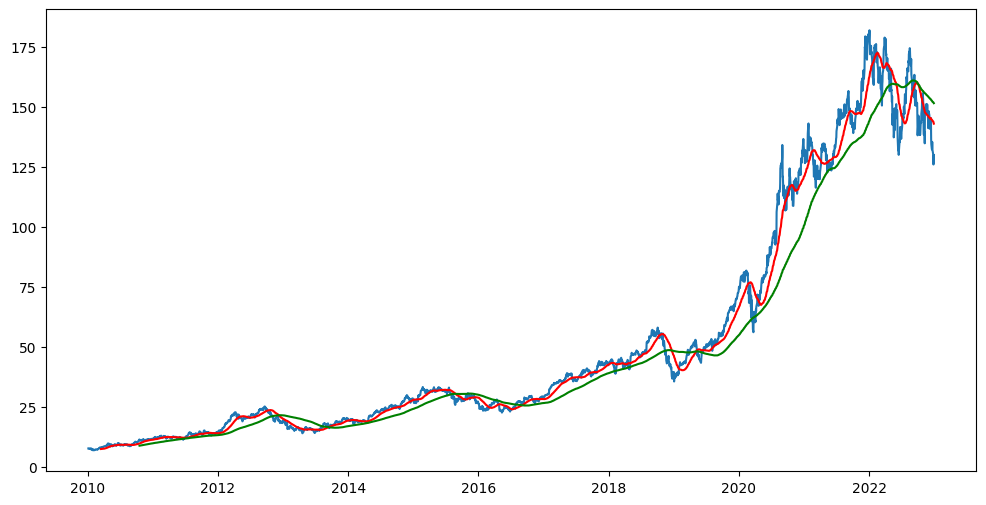

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='AAPL')
plt.plot(ma50, label='50 MA', color='red')
plt.plot(ma200, label='200 MA', color='green')

In [12]:
print(df.shape)

(3272, 5)


In [13]:
# Splitting data into training and testing data
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2290, 1)
(982, 1)


In [14]:
data_training.head()

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714


In [15]:
data_testing.head()

,Close
Date,
2019-02-08,42.602501
2019-02-11,42.357498
2019-02-12,42.722500
2019-02-13,42.544998
2019-02-14,42.700001


In [16]:
# scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.71710501],
       [0.71739828],
       [0.70127194]])

In [18]:
data_training_array.shape

(2290, 1)

In [19]:
# price on a particular day depends on the price of the previous 100 days
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(2190, 100, 1)

ML MODEL

In [21]:
# %pip install tensorflow
# pip install keras
from keras.layers import Dense, Dropout, LSTM
from keras import Sequential

In [22]:
model= Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
69/69 [==============================] - 31s 218ms/step - loss: 0.0382
Epoch 2/50
69/69 [==============================] - 14s 206ms/step - loss: 0.0068
Epoch 3/50
69/69 [==============================] - 15s 215ms/step - loss: 0.0053
Epoch 4/50
69/69 [==============================] - 15s 217ms/step - loss: 0.0060
Epoch 5/50
69/69 [==============================] - 15s 219ms/step - loss: 0.0059
Epoch 6/50
69/69 [==============================] - 15s 219ms/step - loss: 0.0051
Epoch 7/50
69/69 [==============================] - 20s 286ms/step - loss: 0.0058
Epoch 8/50
69/69 [==============================] - 18s 267ms/step - loss: 0.0044
Epoch 9/50
69/69 [==============================] - 22s 315ms/step - loss: 0.0043
Epoch 10/50
69/69 [==============================] - 16s 229ms/step - loss: 0.0045
Epoch 11/50
69/69 [==============================] - 16s 230ms/step - loss: 0.0039
Epoch 12/50
69/69 [==============================] - 17s 241ms/step - loss: 0.0041
Epoch 13/50
6

In [25]:
model.save('keras_model.h5')

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
data_testing.head()

,Close
Date,
2019-02-08,42.602501
2019-02-11,42.357498
2019-02-12,42.722500
2019-02-13,42.544998
2019-02-14,42.700001


In [27]:
past_100_days = data_training.tail(100)

In [28]:
# final_df = past_100_days.append(data_testing, ignore_index=True)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df.head()

,Close
0,55.959999
1,54.470001
2,54.560001
3,54.592499
4,55.007500


In [29]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(1082, 1)

In [30]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])  

In [31]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(982, 100, 1)
(982,)


In [32]:
# Making Predictions
y_predicted = model.predict(x_test)

31/31 [==============================] - 4s 82ms/step


In [33]:
y_predicted.shape

(982, 1)

In [34]:
y_test

array([0.04816933, 0.04649653, 0.04898865, 0.04777672, 0.04883503,
       0.04818639, 0.04905691, 0.05093454, 0.04927882, 0.05253905,
       0.05468976, 0.05486046, 0.05578219, 0.05284628, 0.05595289,
       0.05745499, 0.05690876, 0.05518478, 0.05173679, 0.05243663,
       0.06266108, 0.06609201, 0.06745755, 0.07090551, 0.07498506,
       0.07822822, 0.0756849 , 0.07846719, 0.09029614, 0.08340019,
       0.07945721, 0.07612869, 0.07899633, 0.07942306, 0.08152257,
       0.08372451, 0.08846975, 0.09073996, 0.09132031, 0.09355637,
       0.09884784, 0.09782367, 0.09973542, 0.09688486, 0.09674831,
       0.0973628 , 0.09739694, 0.10401981, 0.10526585, 0.10640949,
       0.1114449 , 0.1108987 , 0.10768968, 0.1060169 , 0.10654605,
       0.09982077, 0.11663396, 0.11429546, 0.11873346, 0.11315182,
       0.10355893, 0.1036272 , 0.09990612, 0.0938636 , 0.0743023 ,
       0.07932065, 0.08317828, 0.08174448, 0.079901  , 0.06981308,
       0.0758044 , 0.06928394, 0.06395836, 0.06278058, 0.06151

In [35]:
y_predicted

array([[0.13356718],
       [0.13487117],
       [0.13625135],
       [0.13764936],
       [0.13901371],
       [0.14030251],
       [0.14148432],
       [0.1425398 ],
       [0.14346549],
       [0.14426355],
       [0.14494842],
       [0.14554706],
       [0.14608738],
       [0.14659485],
       [0.14708038],
       [0.14755367],
       [0.14802682],
       [0.14850579],
       [0.14898545],
       [0.1494452 ],
       [0.14986342],
       [0.1502534 ],
       [0.15065053],
       [0.15109135],
       [0.15161188],
       [0.15224761],
       [0.15302885],
       [0.1539602 ],
       [0.15503307],
       [0.15626296],
       [0.15763894],
       [0.15911528],
       [0.1606231 ],
       [0.16209789],
       [0.1634866 ],
       [0.16475643],
       [0.16589625],
       [0.1669237 ],
       [0.16787356],
       [0.16878128],
       [0.16968146],
       [0.17061663],
       [0.17161277],
       [0.17268437],
       [0.17382059],
       [0.17499481],
       [0.17617421],
       [0.177

In [36]:
scaler.scale_   

array([0.00682769])

In [37]:
scale_factor = 1/0.00166029
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

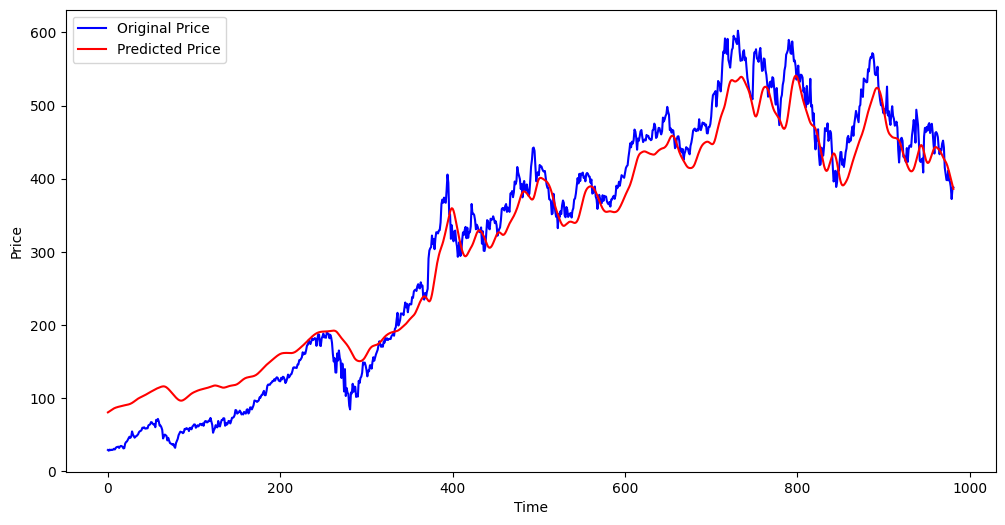

In [38]:
# for AAPL DATA
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()